In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('ggplot')


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold

import warnings
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
str(os.getcwd()) + '/project-14-files/'

'C:\\Users\\Admin\\Desktop\\Machine Learning\\Final Project/project-14-files/'

## Data loading

In [4]:
folder_path = str(os.getcwd()) + '/project-14-files/'
city_adm = pd.read_csv(folder_path + 'city_adm.csv')
city_loc = pd.read_csv(folder_path + 'city_loc.csv')
city_pop = pd.read_csv(folder_path + 'city_pop.csv')
code_Activity_type = pd.read_csv(folder_path + 'code_Activity_type.csv')
code_Club = pd.read_csv(folder_path + 'code_Club.csv')
code_Company_category = pd.read_csv(folder_path + 'code_Company_category.csv')
code_contract_type = pd.read_csv(folder_path + 'code_contract_type.csv')
code_ECO_SECT = pd.read_csv(folder_path + 'code_ECO_SECT.csv')
code_EMP_CONTRACT = pd.read_csv(folder_path + 'code_EMP_CONTRACT.csv')
code_employee_count = pd.read_csv(folder_path + 'code_employee_count.csv')
code_highest_diploma = pd.read_csv(folder_path + 'code_highest_diploma.csv')
code_household_type = pd.read_csv(folder_path + 'code_household_type.csv')
code_JOB_42 = pd.read_csv(folder_path + 'code_JOB_42.csv')
code_JOB_CATEGORY = pd.read_csv(folder_path + 'code_JOB_CATEGORY.csv')
code_JOB_CONDITION = pd.read_csv(folder_path + 'code_JOB_CONDITION.csv')
code_Work_description = pd.read_csv(folder_path + 'code_Work_description.csv')
departments = pd.read_csv(folder_path + 'departments.csv')
regions = pd.read_csv(folder_path + 'regions.csv')
code_Work_description_map = pd.read_csv(folder_path + 'code_Work_description_map.csv')
code_Work_description_n1 = pd.read_csv(folder_path + 'code_Work_description_n1.csv')
code_Work_description_n2 = pd.read_csv(folder_path + 'code_Work_description_n2.csv')

In [5]:
learn_dataset = pd.read_csv(folder_path + 'learn_dataset.csv')
learn_EMP_CONTRACT = pd.read_csv(folder_path + 'learn_dataset_EMP_CONTRACT.csv')
learn_job = pd.read_csv(folder_path + 'learn_dataset_job.csv')
learn_sport = pd.read_csv(folder_path + 'learn_dataset_sport.csv')

test_dataset = pd.read_csv(folder_path + 'test_dataset.csv')
test_EMP_CONTRACT = pd.read_csv(folder_path + 'test_dataset_EMP_CONTRACT.csv')
test_job = pd.read_csv(folder_path + 'test_dataset_job.csv')
test_sport = pd.read_csv(folder_path + 'test_dataset_sport.csv')


## Data preparation

In [6]:
learn_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unique_id        50000 non-null  int64  
 1   insee            50000 non-null  object 
 2   is_student       50000 non-null  bool   
 3   current_age      50000 non-null  int64  
 4   Activity_type    50000 non-null  object 
 5   sex              50000 non-null  object 
 6   household_type   50000 non-null  object 
 7   JOB_42           50000 non-null  object 
 8   highest_diploma  50000 non-null  object 
 9   target           50000 non-null  float64
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 3.5+ MB


In [7]:
learn_EMP_CONTRACT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24451 entries, 0 to 24450
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   unique_id     24451 non-null  int64 
 1   EMP_CONTRACT  24451 non-null  object
dtypes: int64(1), object(1)
memory usage: 382.2+ KB


In [8]:
learn_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19949 entries, 0 to 19948
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   unique_id         19949 non-null  int64  
 1   Company_category  19949 non-null  object 
 2   contract_type     19949 non-null  object 
 3   ECO_SECT          19949 non-null  object 
 4   JOB_CONDITION     19949 non-null  object 
 5   JOB_CATEGORY      19949 non-null  object 
 6   WORKING_HOURS     19865 non-null  float64
 7   Emolument         19949 non-null  int64  
 8   employee_count    19949 non-null  object 
 9   Job_dep           19949 non-null  object 
 10  Work_description  19949 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.7+ MB


In [9]:
learn_sport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7519 entries, 0 to 7518
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   unique_id  7519 non-null   int64 
 1   Club       7519 non-null   object
dtypes: int64(1), object(1)
memory usage: 117.6+ KB


As each dataset has a difference size of the variable, we will preprocess each set to avoid the leakage of data before merging to the final learn set.

In [10]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   unique_id        50000 non-null  int64 
 1   insee            50000 non-null  object
 2   is_student       50000 non-null  bool  
 3   current_age      50000 non-null  int64 
 4   Activity_type    50000 non-null  object
 5   sex              50000 non-null  object
 6   household_type   50000 non-null  object
 7   JOB_42           50000 non-null  object
 8   highest_diploma  50000 non-null  object
dtypes: bool(1), int64(2), object(6)
memory usage: 3.1+ MB


Comment: Each learn & test set has the same size with the highest observation of 50000. 

### CATEGORICAL FEATURES
How we handling categorical features:
1. Examine relation between each feature and the target:
- Variables with high number of categories: try to simplify by regrouping the categories.
- Variables with low number of categories & relatively balanced distribution: use label encoding.
- Variables with low number of categories but highly imbalanced distribution: turn to a binary variable.
2. Create a function to transform all the categorical features. This function can be applied to both train & test set.

In [11]:
# First merge to examine the correlation between each feature and the target
learn_files = [learn_EMP_CONTRACT,learn_job, learn_sport]
learn = learn_dataset

for df in learn_files:
    learn = learn.merge(df,on='unique_id',how='outer')
learn.shape

(50000, 22)

#### Activity type

In [12]:
code_Activity_type

,Code,Libellé
0,type|1|1,"Actifs ayant un emploi, y compris sous apprent..."
1,type|1|2,Chômeurs
2,type|2|1,Retraités ou préretraités
3,type|2|2,"Elèves, étudiants, stagiaires non rémunéré de ..."
4,type|2|3,Moins de 14 ans
5,type|2|4,Femmes ou hommes au foyer
6,type|2|5,Autres inactifs


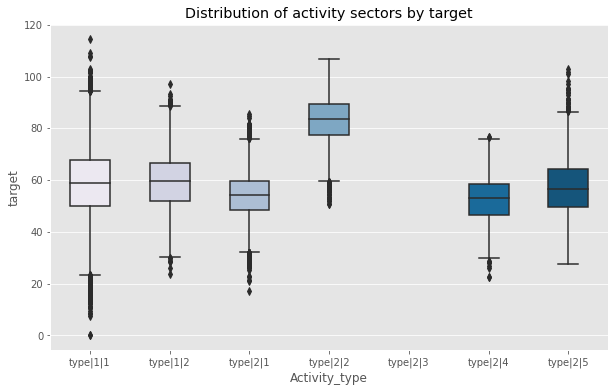

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(data=learn, x='Activity_type',y='target', width=0.5, order=code_Activity_type.Code, palette="PuBu")
plt.title('Distribution of activity sectors by target')
plt.show()

Based on the correlation between each activity type to the target, we'll regroup this feature into 4 categories:

- 1: no salary (type|2|2)
- 2: salary or allowance (type|1|2, type|1|1 & type|2|5)
- 3: partial salary (type|2|1 & type|2|4)
- 4: Under 14 (type|2|3)

In [14]:
def trans_activity_type(x):
    return 'no_salary' if x == 'type|2|2'\
        else 'salary_allowance' if x in ['type|1|2', 'type|1|1', 'type|2|5']\
        else 'partial_salary' if x in ['type|2|1', 'type|2|4']\
        else 'under_14'

#### Household type

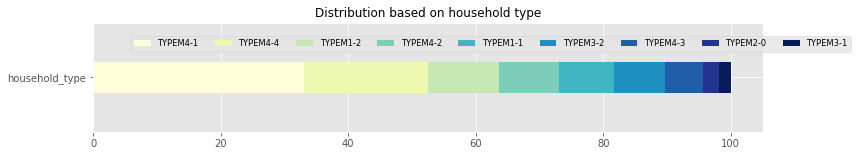

In [15]:
household_type_pct = learn.household_type.value_counts(normalize=True)*100

household_type_pct.to_frame().T.plot.barh(stacked=True, figsize=(12,2), width=0.2, colormap='YlGnBu')
plt.title('Distribution based on household type', fontsize=12)
plt.legend(ncol=9, bbox_to_anchor=(0.05, 0.7), loc='lower left', fontsize='small')
plt.show()

The distribution of feature is quite balance, we will keep it the same for encoding later

#### Job_42, Work_description

In [16]:
code_JOB_42

,Code,Libellé
0,csp_1_1,Agriculteurs sur petite exploitation
1,csp_1_2,Agriculteurs sur moyenne exploitation
2,csp_1_3,Agriculteurs sur grande exploitation
3,csp_2_1,Artisans
4,csp_2_2,Commerçants et assimilés
5,csp_2_3,Chefs d'entreprise de 10 salariés ou plus
6,csp_3_1,Professions libérales
7,csp_3_3,Cadres de la fonction publique
8,csp_3_4,"Professeurs, professions scientifiques"
9,csp_3_5,"Professions de l'information, des arts et des ..."


In [17]:
#learn.JOB_42.value_counts()

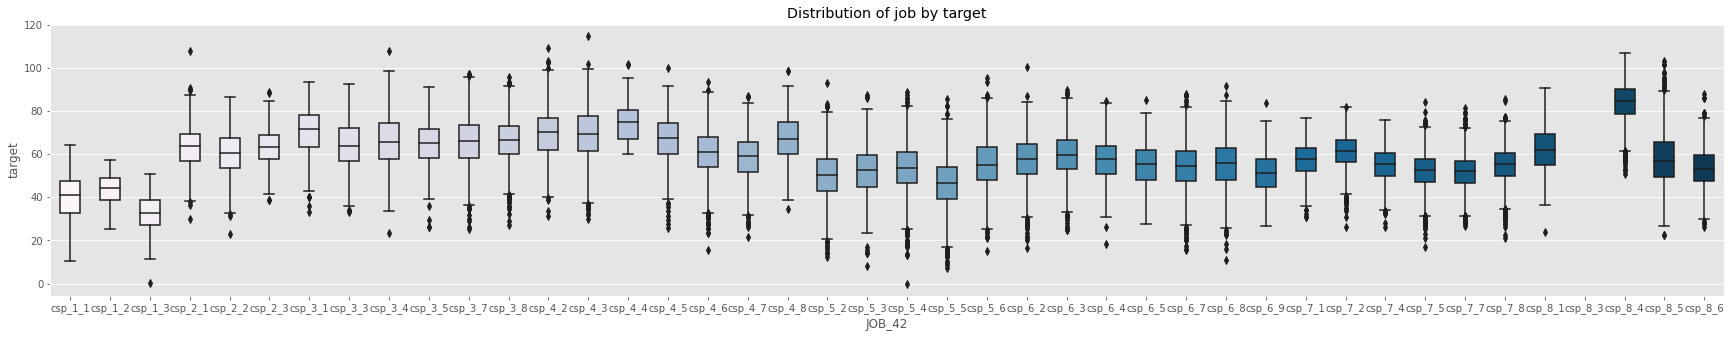

In [18]:
plt.figure(figsize=(30,5))
sns.boxplot(data=learn, x='JOB_42',y='target', width=0.5, order=code_JOB_42.Code, palette="PuBu")
plt.title('Distribution of job by target')
plt.show()

As the PCS 2003 is a complementary norm which adds modalities to the N2 level of the PCS-ESEv2017, we can drop the work_description column and chose only JOB_42 which describe the job categories more precisely

#### Diploma
Regroup the diploma into 4 level: middle school & below, high school, bachelor & equivalent, master's and phD.

In [19]:
code_highest_diploma

,Code,Libellé
0,edu1,Pas de scolarité ou arrêt avant la fin du prim...
1,edu2,Aucun diplôme et scolarité interrompue à la fi...
2,edu3,Aucun diplôme et scolarité jusqu’à la fin du c...
3,edu1-1,CEP (certificat d’études primaires)
4,edu1-2,"BEPC, brevet élémentaire, brevet des collèges,..."
5,edu1-3,"CAP, BEP ou diplôme de niveau équivalent"
6,edu1-4,"Baccalauréat général ou technologique, brevet ..."
7,edu1-5,"Baccalauréat professionnel, brevet professionn..."
8,edu1-6,"BTS, DUT, Deug, Deust, diplôme de la santé ou ..."
9,edu1-7,"Licence, licence pro, maîtrise, diplôme équiva..."


In [20]:
up_to_middle = ['edu1', 'edu2', 'edu3', 'edu1-1', 'edu1-2']
high_school = ['edu1-3', 'edu1-4', 'edu1-5']
bachelor = ['edu1-6', 'edu1-7']
masters_phD = ['edu1-8', 'edu1-9']

def trans_dip(x):
    return 'up_to_middle' if x in up_to_middle \
        else 'high_school' if x in high_school \
        else 'bachelor' if x in bachelor \
        else 'masters_phD'

#### EMP_CONTRACT

In [21]:
learn.EMP_CONTRACT.value_counts()

ec16    18272
ec15     2128
ec21     1711
ec22     1109
ec11      502
ec12      421
ec13      207
ec14       65
ec23       36
Name: EMP_CONTRACT, dtype: int64

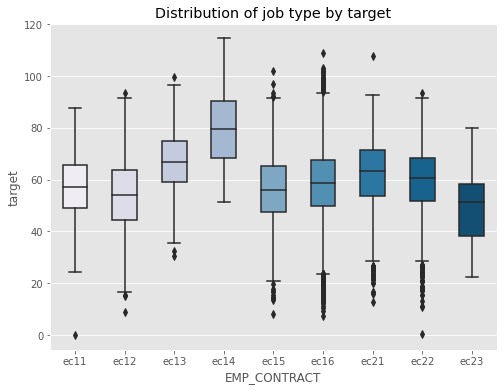

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(data=learn, x='EMP_CONTRACT',y='target', width=0.5, order=code_EMP_CONTRACT.Code, palette="PuBu")
plt.title('Distribution of job type by target')
plt.show()

#### Company_category

The initial test with the model showed that type of employers doesn't have a significant affect to the target, we will group them based on their characteristic to reduce the dimension:
- Public service: ct-1, ct-2, ct-3, ct-4 & ct-5
- Private company: ct-6, ct-8, ct-9
- Individuals Employers: ct-7

In [23]:
code_Company_category

,Code,Libellé
0,ct_1,Fonction Publique d'État
1,ct_2,Fonction Publique Territoriale
2,ct_3,Fonction Publique Hospitalière
3,ct_4,Autres organismes publics administratifs
4,ct_5,Personnes morales de droit public soumises au ...
5,ct_6,Entreprises individuelles
6,ct_7,Particuliers Employeurs
7,ct_8,Organismes privés spécialisés et groupements d...
8,ct_9,Autres sociétés privées


In [24]:
def trans_comp_cat(x):
    return 'public_service' if x in ['ct_1', 'ct_2', 'ct_3', 'ct_4', 'ct_5']\
        else 'private_com' if x in ['ct_6', 'ct_8', 'ct_9']\
        else 'individuals_emp'

#### contract_type

In [25]:
learn.contract_type.value_counts()

CDI    17186
AUT     1169
CDD      763
TTP      348
APP      312
TOA      171
Name: contract_type, dtype: int64

Consider the domination of CDI contract, we can turn the feature into 2 groups: CDI and non-CDI.

#### ECO_SECT

In [26]:
code_ECO_SECT

,Code,Libellé
0,AZ,"Agriculture, sylviculture et pêche"
1,BZ,Industries extractives
2,CA,"Fabrication de denrées alimentaires, de boisso..."
3,CB,"Fabrication de textiles, industries de l'habil..."
4,CC,"Travail du bois, industries du papier et impri..."
5,CD,Cokéfaction et raffinage
6,CE,Industrie chimique
7,CF,Industrie pharmaceutique
8,CG,Fabrication de produits en caoutchouc et en pl...
9,CH,Métallurgie et fabrication de produits métalli...


Base on the information of Insee, we can group each economic sectors into big field

- Industry (and agriculture): AZ to EZ
- Construction: FZ
- Trade: GZ
- Accommodation and catering: IZ
- Acting: ape 7820Z
- Other services excluding interim: HZ, JZ to MC, NZ excluding 7820Z, OZ to UZ

In [27]:
def eco_sec_trans(x):
    ind = list(code_ECO_SECT['Code'].iloc[0:17]) 
    return 'industry_agri' if x in ind\
        else 'construction:' if x == 'FZ'\
        else 'trade' if x == 'GZ'\
        else 'acc_catering' if x == 'IZ'\
        else 'other'

#### JOB_CONDITION

In [28]:
code_JOB_CONDITION

,Code,Libellé
0,C,Temps complet
1,D,Travail à domicile
2,F,Faible temps partiel
3,K,Condition d'emploi mixte à dominante temps com...
4,P,Temps partiel
5,Y,Condition d'emploi mixte à dominante temps non...


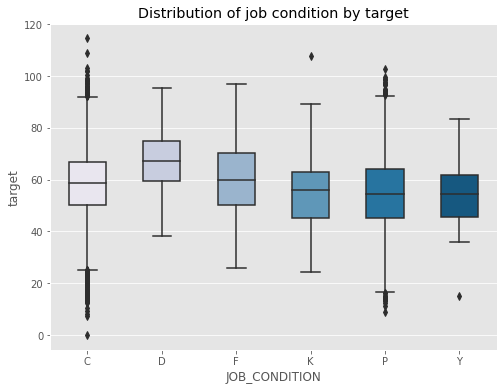

In [29]:
plt.figure(figsize=(8,6))
sns.boxplot(data=learn, x='JOB_CONDITION',y='target', width=0.5, order=code_JOB_CONDITION.Code, palette="PuBu")
plt.title('Distribution of job condition by target')
plt.show()

Based on the dominance of full-time and part-time categories, as well as their characteristics, we'll regroup this feature into 3 categories:

- 1: Full-time (C)
- 2: Part-time & work from home (P & D)
- 3: Others (F, K, Y)

In [30]:
def trans_job_condition(x):
    return 'fulltime' if x == 'C'\
        else 'parttime_wfh' if x in ['P', 'D']\
        else 'others'

#### JOB_CATEGORY

In [31]:
code_JOB_CATEGORY

,Code,Libellé
0,O,Emploi ordinaire
1,A,Apprenti
2,X,"Autres (emploi aidé, stagiaire, indemnité de c..."


In [32]:
learn.JOB_CATEGORY.value_counts(normalize=True)*100

O    96.375758
X     2.035190
A     1.589052
Name: JOB_CATEGORY, dtype: float64

Based on the dominence of Emploi ordinaire (O), we will divide this categories into O (valued by 1) and other (valued by 0)

#### Employee count (company size)

In [33]:
code_employee_count

,Code,Libellé
0,tr_0,"0 poste (salariés présents en cours d'année, m..."
1,tr_1,[1;10[ postes
2,tr_2,[10;20[ postes
3,tr_3,[20;50[ postes
4,tr_4,[50;100[ postes
5,tr_5,[100;250[ postes
6,tr_6,[250;+[ postes


We'll regroup the enterprises into 3 categories:

- Micro: 10 employees or less (tr_0 & tr_1)
- Small & medium: from 10 to 250 employees (tr_2, tr_3, tr_4 & tr_5)
- Large: more than 250 employees (tr_6)

In [34]:
micro= ['tr_0', 'tr_1']
small_medium = ['tr_2', 'tr_3', 'tr_4', 'tr_5']
large = ['tr_6']
def trans_employee_count(x):
    return 'micro' if x in micro \
         else 'small_medium' if x in small_medium \
         else 'large'

#### Club

In [35]:
code_Club

,Code,Categorie,Nom fédération,Nom catégorie
0,CF101,1,Fédération française d'athlétisme,Fédération unisport olympique
1,CF102,1,Fédération française d'aviron,Fédération unisport olympique
2,CF103,1,Fédération française de badminton,Fédération unisport olympique
3,CF105,1,Fédération française de basketball,Fédération unisport olympique
4,CF106,1,Fédération française de boxe,Fédération unisport olympique
...,...,...,...,...
92,CF501,5,Fédération française handisport,Fédération multisports sport et handicap
93,CF601,6,Fédération française du sport universitaire,Fédération multisports scolaire ou universitaire
94,CF603,6,Union nationale des clubs universitaires,Fédération multisports scolaire ou universitaire
95,CF604,6,Union nationale du sport scolaire (UNSS),Fédération multisports scolaire ou universitaire


Turn to binary, join club value with 1, without club value with 0

### NUMERICAL FEATURES
To help encode the location feature, we add:

- City population
- town type

#### City population

In [36]:
print(city_pop.shape)
city_pop.head(3)

(35795, 2)


,insee,INHABITANTS
0,01001,785
1,01002,241
2,01004,14557


In [37]:
print(city_adm.shape)
city_adm.head(3)

(35795, 4)


,Nom de la commune,insee,town_type,DEP
0,L' Abergement-Clémenciat,01001,Commune simple,01
1,L' Abergement-de-Varey,01002,Commune simple,01
2,Ambérieu-en-Bugey,01004,Chef-lieu canton,01


### FEATURE TRANSFORMER

Prepare for ML:

- Recategorize the categorical features.
- Drop unused columns.
- Process each learn dataset before merging

In [38]:
def preprocessing1(df):
    
    # add city population
    df = df.merge(city_pop, on='insee', how='left')
    df.rename(columns={'INHABITANTS': 'city_population'}, inplace=True)
    
    # recategorize
    df['activity_type'] = df['Activity_type'].apply(trans_activity_type)
    df['diploma'] = df['highest_diploma'].apply(trans_dip)
    
     # turn to binary
    df['is_student'] = np.where(df['is_student']==True, 1, 0)
    df['gender_female'] = np.where(df['sex']=='Female', 1, 0)
    
    # drop unused columns
    cols_to_drop = ['insee', 'highest_diploma', 'sex', 'Activity_type']
    df.drop(cols_to_drop, axis=1, inplace=True)
    
    return df
    
def preprocessing2(df):
     
    # rename
    df.rename(columns={'WORKING_HOURS': 'working_hours'}, inplace=True)

    # recategorize   
    df['company_category'] = df['Company_category'].apply(trans_comp_cat)
    df['eco_sect'] = df['ECO_SECT'].apply(eco_sec_trans)
    df['job_condition'] = df['JOB_CONDITION'].apply(trans_job_condition)
    df['employee_count'] = df['employee_count'].apply(trans_employee_count)
    
    # turn to binary
    df['job_category_ordinary'] = np.where(df['JOB_CATEGORY']=='O', 1, 0)
    df['contract_type_CDI'] = np.where(df['contract_type']=='CDI', 1, 0)
    
     # drop unused columns
    cols_to_drop = ['Job_dep', 'Work_description', 'Company_category', 
                    'ECO_SECT', 'JOB_CONDITION', 'JOB_CATEGORY','contract_type' ]
    df.drop(cols_to_drop, axis=1, inplace=True)
    
    
    return df

In [39]:
learn_dataset_new = preprocessing1(learn_dataset)
learn_job_new = preprocessing2(learn_job)

#### Encoding
As the dependance between feature and target is linear, we will use Label Encoding instead of One hot Encoding to advoid high dimension

In [40]:
le = LabelEncoder()
dataset_cat = ['household_type', 'JOB_42', 'activity_type', 'diploma' ]
job_cat = ['employee_count', 'company_category', 'eco_sect', 'job_condition']

In [41]:
def encoder1(df):
    # encoding for learn_dataset_new
    for cat in dataset_cat:
        encoder_column = le.fit_transform(df[cat])
        df[cat] = encoder_column
    return df


def encoder2(df):
    # encoding for learn_job_new
    for cat in job_cat:
        encoder_column = le.fit_transform(df[cat])
        df[cat] = encoder_column
    return df
    
def encoder3(df):
    # encoding for learn_EMP_CONTRACT
    df['EMP_CONTRACT'] = le.fit_transform(df['EMP_CONTRACT'])
    return df

In [42]:
# Final merge and dealing woth missing data
def final(x,y,z,t):
    a = encoder1(x)
    b = encoder2(y)
    c = encoder3(z)
    sum = [b,c,t]
    model = a
    for i in sum:
        model = model.merge(i,on='unique_id',how='outer')
    
    # Turn club into binary
    model['Club'].loc[~model['Club'].isnull()] = 1  # not nan
    model['Club'].loc[model['Club'].isnull()] = 0   # nan
    
    nan = ['EMP_CONTRACT', 'working_hours', 'Emolument', 'employee_count', 'company_category',
      'eco_sect', 'job_condition', 'job_category_ordinary', 'contract_type_CDI']
    model.mean()
    final_data = model.fillna(model.mean())
    
    return final_data

In [43]:
final_learn = final(learn_dataset_new,learn_job_new,learn_EMP_CONTRACT,learn_sport)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## Model prediction

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import category_encoders as ce
import warnings
from sklearn.metrics import mean_squared_error, r2_score

Split to train & test set (for validation):

In [45]:
# Get label
y = np.array(final_learn['target'])

del final_learn['target']
del final_learn['unique_id']
final_learn.describe()

,is_student,current_age,household_type,JOB_42,city_population,activity_type,diploma,gender_female,working_hours,Emolument,employee_count,company_category,eco_sect,job_condition,job_category_ordinary,contract_type_CDI,EMP_CONTRACT,Club
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.120840,48.948180,4.730060,25.680720,46283.980060,1.513300,1.510500,0.52062,1598.075661,22567.578074,1.302521,1.061206,2.754624,0.420623,0.963758,0.861497,4.875833,0.150380
std,0.325945,20.335512,2.511087,10.849119,81215.018795,0.659448,1.115596,0.49958,333.813649,8373.046331,0.514578,0.213650,0.573694,0.507855,0.118052,0.218191,0.769826,0.357447
min,0.000000,15.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.00000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,32.000000,4.000000,17.000000,2669.000000,1.000000,1.000000,0.00000,1598.075661,22567.578074,1.302521,1.000000,2.754624,0.000000,0.963758,0.861497,4.875833,0.000000
50%,0.000000,48.000000,5.000000,27.000000,11225.000000,2.000000,1.000000,1.00000,1598.075661,22567.578074,1.302521,1.061206,2.754624,0.420623,0.963758,0.861497,4.875833,0.000000
75%,0.000000,65.000000,7.000000,35.000000,48287.000000,2.000000,3.000000,1.00000,1683.000000,22567.578074,1.302521,1.061206,3.000000,0.420623,1.000000,1.000000,5.000000,0.000000
max,1.000000,110.000000,8.000000,40.000000,474246.000000,2.000000,3.000000,1.00000,3000.000000,161826.000000,2.000000,2.000000,4.000000,2.000000,1.000000,1.000000,8.000000,1.000000


In [46]:
# split train and test set
X = StandardScaler().fit_transform(final_learn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Learning Base Dimension:  (50000, 18)


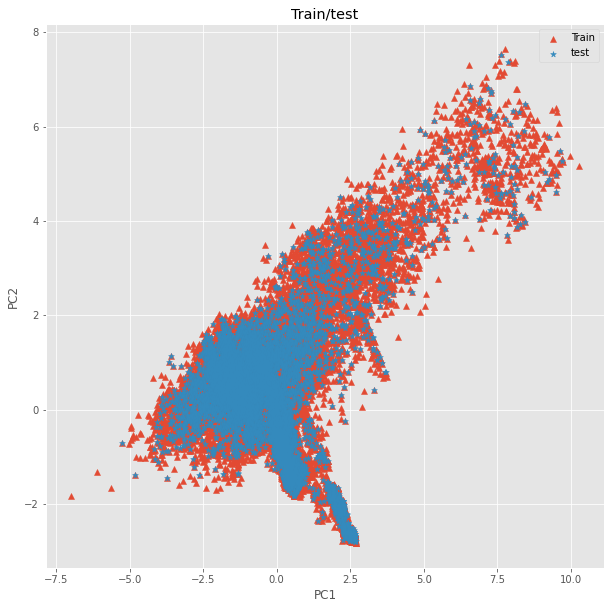

In [47]:
# PCA 
n_components = 2 
print('Learning Base Dimension: ',X.shape)
# using sklearn    
pca = PCA(n_components)
pca_train = pca.fit_transform(X)
pca_test = pca.transform(X_test)

n_components = pca.n_components_
plt.figure(1,figsize=(10,10))
plt.scatter(pca_train[:, 0], pca_train[:, 1],marker='^', label = "Train")
plt.scatter(pca_test[:, 0], pca_test[:, 1],marker='*',label = "test")
plt.legend()
plt.title("Train/test")
plt.xlabel("PC1")
plt.ylabel("PC2");
plt.show()

In [48]:
# Functions to get model scores

def model_score(model_name, model):
    pipeline = make_pipeline(StandardScaler(), model)
    # fit the full train set
    pipeline.fit(X_train, y_train)
    
    # get score on train set
    print('\n', model_name, ' scores on train set:')
    y_train_pred = pipeline.predict(X_train)
    print('Mse: ', mean_squared_error(y_train, y_train_pred))
    print('R2 score: ', r2_score(y_train,y_train_pred))
    
    # get score on test set
    print('\n', model_name, ' scores on test set:')
    y_pred = pipeline.predict(X_test)
    print('Mse: ', mean_squared_error(y_test, y_pred))
    print('R2 score: ', r2_score(y_test,y_pred))
    
def cv_score(model_name, model):
    pipeline = make_pipeline(StandardScaler(), model)
    cv_model = cross_val_score(pipeline, X_train, y_train, 
                                   cv=5, scoring='neg_mean_squared_error')
    print(model_name, 'cv scores:')
    print('CV mse :\n', -cv_model)
    print('CV mse - mean :', (-cv_model).mean())
    print('CV mse - std:', cv_model.std())

In [49]:
# Functions to get grid scores
def grid_score(model_name, model, params_grid_model):
    pipeline = make_pipeline(StandardScaler(), model)
    
    model_grid = GridSearchCV(pipeline,
                        param_grid=params_grid_model,
                        scoring='neg_mean_squared_error',
                        cv=5,
                        n_jobs=-1,
                        verbose=1,
                        return_train_score=True
                       )

    warnings. filterwarnings("ignore")
    model_grid.fit(X_train, y_train)
    
    print(model_name, ' - Best hyperparameters:\n{}'.format(model_grid.best_params_))
    
    # get score on train set
    print('\n', model_name, ' GridSearch best scores on train set:')
    model_grid.best_estimator_.fit(X_train, y_train)
    y_train_pred = model_grid.predict(X_train)
    print('Mse: ', mean_squared_error(y_train, y_train_pred))
    print('R2 score: ', r2_score(y_train,y_train_pred))
    
    # get score on test set
    print('\n', model_name, ' GridSearch best scores on test set:')
    y_pred = model_grid.predict(X_test)
    print('Mse: ', mean_squared_error(y_test, y_pred))
    print('R2 score: ', r2_score(y_test,y_pred))

### Linear Regression

In [50]:
lr =  LinearRegression()
cv_score('LR', lr)
model_score('LR', lr)

LR cv scores:
CV mse :
 [101.54198901  99.79539317 100.54330406 102.52154097  99.95990356]
CV mse - mean : 100.87242615522254
CV mse - std: 1.0265391337292622

 LR  scores on train set:
Mse:  100.7287217668242
R2 score:  0.4712305597997283

 LR  scores on test set:
Mse:  100.49315515652242
R2 score:  0.4718469688219237


### Support Vector Machine

In [51]:
svr = SVR()
cv_score('SVM', svr)
model_score('SVM', svr)

SVM cv scores:
CV mse :
 [82.11051802 81.34050194 82.36024267 83.99451942 81.16847158]
CV mse - mean : 82.19485072391214
CV mse - std: 1.0056480416819065

 SVM  scores on train set:
Mse:  79.08924721421509
R2 score:  0.5848256957719565

 SVM  scores on test set:
Mse:  81.4991877777608
R2 score:  0.5716718915200478


### Random Forest Regressor

In [52]:
rf = RandomForestRegressor()
model_score('RF', rf)


 RF  scores on train set:
Mse:  7.788479363911573
R2 score:  0.9591148403252816

 RF  scores on test set:
Mse:  56.05957181056579
R2 score:  0.7053726422244423


The model is higly overfitting. We will set main meta-parameters by GridSearchCV to avoid fitting problem as well as to get better result

In [53]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5, 10, 15],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [54]:
grid_search.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_split': 10,
 'n_estimators': 1000}

In [55]:
rf_best = RandomForestRegressor(max_depth= 15,max_features= 'auto',min_samples_split= 10, n_estimators= 1000)
model_score('RF', rf_best)


 RF  scores on train set:
Mse:  38.46850336048589
R2 score:  0.7980618771838137

 RF  scores on test set:
Mse:  55.36369425067893
R2 score:  0.7090299046719255


As MSE score is low for training and high for testing, model is overly fitted. The reason behind it is the small size of the dataset. To dealing with over fitting, we will try to run the gridsearchCV second time with lower the range of param feature to reduce the complexity of the learned model 

In [56]:
# Create the parameter grid based on the results of random search 
param_grid2 = {
    'max_depth': [5, 7, 9],
    'max_features': ['auto'],
    'min_samples_split': [3, 5, 9],
    'n_estimators': [100, 150, 200]
}
# Create a based model
rf2 = RandomForestRegressor()
# Instantiate the grid search model
grid2_search = GridSearchCV(estimator = rf, param_grid = param_grid2, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid2_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9], 'max_features': ['auto'],
                         'min_samples_split': [3, 5, 9],
                         'n_estimators': [100, 150, 200]},
             verbose=2)

In [57]:
grid2_search.best_params_

{'max_depth': 9,
 'max_features': 'auto',
 'min_samples_split': 3,
 'n_estimators': 200}

In [58]:
rf_best = RandomForestRegressor(max_depth= 9,max_features= 'auto',min_samples_split= 10, n_estimators= 1000)
model_score('RF', rf_best)


 RF  scores on train set:
Mse:  62.70549338873833
R2 score:  0.6708312380514547

 RF  scores on test set:
Mse:  65.9731222920843
R2 score:  0.6532708674478839


Both train and test set has quite similar MSE score which mean model is fitted well. However we will try other model to test whether the score is better or not

### XGBoost Regression

In [59]:
# First run to observe the overall result of the model
xgb = XGBRegressor()
model_score('XGB', xgb)


 XGB  scores on train set:
Mse:  32.23328882791158
R2 score:  0.8307932654123876

 XGB  scores on test set:
Mse:  44.46986601423563
R2 score:  0.7662836389710362


General Approach for Parameter Tuning

1. Choose a relatively high learning rate.
2. Tune tree-specific parameters ( max_depth, min_child_weight, gamma, subsample, colsample_bytree) for decided learning rate and number of trees.
3. Tune regularization parameters (lambda, alpha) for xgboost which can help reduce model complexity and enhance performance.
4. Lower the learning rate and decide the optimal parameters

In [60]:
# Step 1: Fix learning rate and number of estimators for tuning tree-based parameters
xgb1 = XGBRegressor(max_depth=3,
                   gamma=0,
                   colsample_bytree=0.8,
                   subsample=0.8,
                   seed=3)
params_xgb1 = {'xgbregressor__n_estimators': [100, 150],  
              'xgbregressor__learning_rate': [0.05, 0.1, 0.2]
              }
grid_score('XGB1', xgb1, params_xgb1)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
XGB1  - Best hyperparameters:
{'xgbregressor__learning_rate': 0.2, 'xgbregressor__n_estimators': 150}

 XGB1  GridSearch best scores on train set:
Mse:  48.46945970310357
R2 score:  0.745562451061889

 XGB1  GridSearch best scores on test set:
Mse:  50.82265073310628
R2 score:  0.7328958674311004


In [61]:
# Step 2: Tune max_depth & min_child_weight'
xgb2 = XGBRegressor(n_estimators=150,
                   max_depth=3,
                   gamma=0, 
                   learning_rate=0.2,
                   colsample_bytree=0.8,
                   subsample=0.8,
                   seed=3
                   )
params_xgb2 = {'xgbregressor__min_child_weight': [1,2,3],
               'xgbregressor__max_depth': [3,4,5],
              }
grid_score('XGB2', xgb2, params_xgb2)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
XGB2  - Best hyperparameters:
{'xgbregressor__max_depth': 5, 'xgbregressor__min_child_weight': 2}

 XGB2  GridSearch best scores on train set:
Mse:  37.934690439104905
R2 score:  0.8008640963985448

 XGB2  GridSearch best scores on test set:
Mse:  46.02338290837822
R2 score:  0.7581189569551338


In [62]:
# Step 3: Tune gamma
xgb3 = XGBRegressor(n_estimators=150,
                   max_depth=5,
                   gamma=0,
                   learning_rate=0.2,
                   colsample_bytree=0.8,
                   subsample=0.8,
                   min_child_weight=2,
                   seed=3
                   )
params_xgb3 = {'xgbregressor__gamma': [i/10.0 for i in range(0,5)]
              }
grid_score('XGB3', xgb3, params_xgb3)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
XGB3  - Best hyperparameters:
{'xgbregressor__gamma': 0.1}

 XGB3  GridSearch best scores on train set:
Mse:  37.76463122975732
R2 score:  0.8017568121140861

 XGB3  GridSearch best scores on test set:
Mse:  45.77440232397259
R2 score:  0.759427502299874


In [63]:
# Step 4: Tune subsample and colsample_bytree
xgb4 = XGBRegressor(n_estimators=150,
                   max_depth=5,
                   gamma=0.1, 
                   learning_rate=0.2,
                   min_child_weight=2,
                   seed=3
                   )
params_xgb4 = {'xgbregressor__subsample': [i/100.0 for i in range(75,90,5)],
               'xgbregressor__colsample_bytree': [i/100.0 for i in range(75,90,5)]
              }
grid_score('XGB4', xgb4, params_xgb4)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
XGB4  - Best hyperparameters:
{'xgbregressor__colsample_bytree': 0.85, 'xgbregressor__subsample': 0.85}

 XGB4  GridSearch best scores on train set:
Mse:  37.09826446313611
R2 score:  0.8052548648638274

 XGB4  GridSearch best scores on test set:
Mse:  45.020339992811685
R2 score:  0.7633905613289146


In [64]:
# Step 5: Tuning Regularization Parameters
xgb5 = XGBRegressor(n_estimators=150,
                   max_depth=5,
                   gamma=0.1, 
                   learning_rate=0.2,
                   min_child_weight=2,
                   subsample=0.85,
                    colsample_bytree=0.85,
                   seed=3
                   )
params_xgb5 = {'xgbregressor__reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
              }
grid_score('XGB5', xgb5, params_xgb5)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
XGB5  - Best hyperparameters:
{'xgbregressor__reg_alpha': 1e-05}

 XGB5  GridSearch best scores on train set:
Mse:  37.09826515702964
R2 score:  0.8052548612212744

 XGB5  GridSearch best scores on test set:
Mse:  45.02034032671179
R2 score:  0.7633905595740651


In [65]:
# Step 6: Reducing Learning Rate
xgb6 = XGBRegressor(n_estimators=150,
                   max_depth=5,
                   gamma=0.3, 
                   min_child_weight=2,
                   subsample=0.85,
                    colsample_bytree=0.85,
                    reg_alpha=1e-05,
                   )
params_xgb6 = {'xgbregressor__learning_rate':[0.025, 0.05, 0.1],
               'xgbregressor__n_estimators': [150,180,200]
              }
grid_score('XGB6', xgb6, params_xgb6)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
XGB6  - Best hyperparameters:
{'xgbregressor__learning_rate': 0.1, 'xgbregressor__n_estimators': 200}

 XGB6  GridSearch best scores on train set:
Mse:  41.025339236076306
R2 score:  0.7846399191672155

 XGB6  GridSearch best scores on test set:
Mse:  47.17207952803856
R2 score:  0.752081853227694


Based on the above result, we will take XGBoot Regression as our model for prediction and take the generated parameter as final model

In [66]:
xgb_best = XGBRegressor(n_estimators=200,
                   max_depth=5,
                   gamma=0.3, 
                   min_child_weight=2,
                   subsample=0.85,
                    colsample_bytree=0.85,
                    reg_alpha=1e-05,
                    learning_rate=0.1,
                   seed=3
                   )
cv_score('XGB_best', xgb_best)
model_score('XGB_best', xgb_best)

XGB_best cv scores:
CV mse :
 [46.43485079 45.42142975 45.45420976 48.05597715 47.45642664]
CV mse - mean : 46.56457881805322
CV mse - std: 1.0560492547443472

 XGB_best  scores on train set:
Mse:  41.11948858243432
R2 score:  0.7841456877673156

 XGB_best  scores on test set:
Mse:  47.32469070174057
R2 score:  0.7512797881133405


## Final results

In [67]:
test_dataset_new = preprocessing1(test_dataset)
test_job_new = preprocessing2(test_job)

In [68]:
final_test = final(test_dataset_new,test_job_new,test_EMP_CONTRACT,test_sport)

In [69]:
predictions = final_test[['unique_id']]
del final_test['unique_id']

In [70]:
best = make_pipeline(StandardScaler(), xgb_best)
best.fit(X,y)
y_pred_best = best.predict(X)
print('Model scores on full train set:')
print('Mse:', mean_squared_error(y, y_pred_best))
print('R2 score:', r2_score(y, y_pred_best))

Model scores on full train set:
Mse: 41.96795640837439
R2 score: 0.7796402251529241


In [71]:
# cross validation on the full learn set
cv_best = cross_val_score(best, X, y, cv=5, scoring='neg_mean_squared_error')
                     
print('XGB best - cv scores:')
print('CV mse :\n', -cv_best)
print('CV mse - mean :', (-cv_best).mean())
print('CV mse - std:', cv_best.std())

XGB best - cv scores:
CV mse :
 [66.37125656 44.5239323  58.10722201 51.0650725  66.45009452]
CV mse - mean : 57.30351557789088
CV mse - std: 8.587964808300237


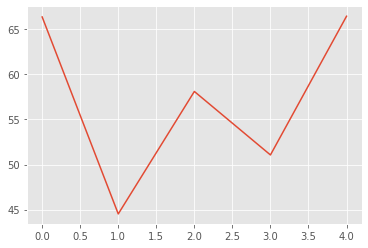

In [72]:
plt.plot(-cv_best, label = "CV estimate")
plt.show()


Based on the cross validation, the expectation range of MSE on the test set will be:

In [73]:
print('Range of MSE:', 57.30351557789088 + 8.587964808300237*1, 'to' , 57.30351557789088 - 8.587964808300237*1) 

Range of MSE: 65.89148038619112 to 48.71555076959064


In [74]:
pred = best.predict(final_test)

In [75]:
predictions['target'] = pred.tolist() 

In [77]:
#predictions.to_csv(folder_path+ 'predictions.csv')